In [1]:
!pip install deepface

In [2]:
from deepface import DeepFace

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import cv2

In [5]:
img = cv2.imread('happy.jpg')

In [6]:
predictions = DeepFace.analyze(img,actions=['emotion'])

In [7]:
predictions['dominant_emotion']

'happy'

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [9]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

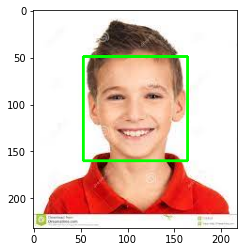

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [12]:
cv2.putText(img,predictions['dominant_emotion'],(0,50),font,1,(0,0,255),2,cv2.LINE_4)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[246, 255, 254],
        [243, 255, 254],
        [204, 226, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[231, 232, 230],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [251, 251, 251],
        [248, 248, 248],
        [255, 255, 255]],

       [[255, 255, 254],
        [247, 239, 239],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

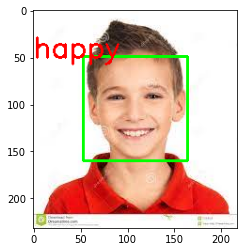

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame,actions=['emotion'])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,result['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Orginal Video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()